In [2]:
# import libraries
import os
import numpy as np
import pandas as pd
import ast
import mne 
import sys
import submitit
import gc
import matplotlib.pyplot as plt
import re 

# expected_unexpected_stim

(41, 53, 751)
(13, 53, 751)
(7, 53, 751)


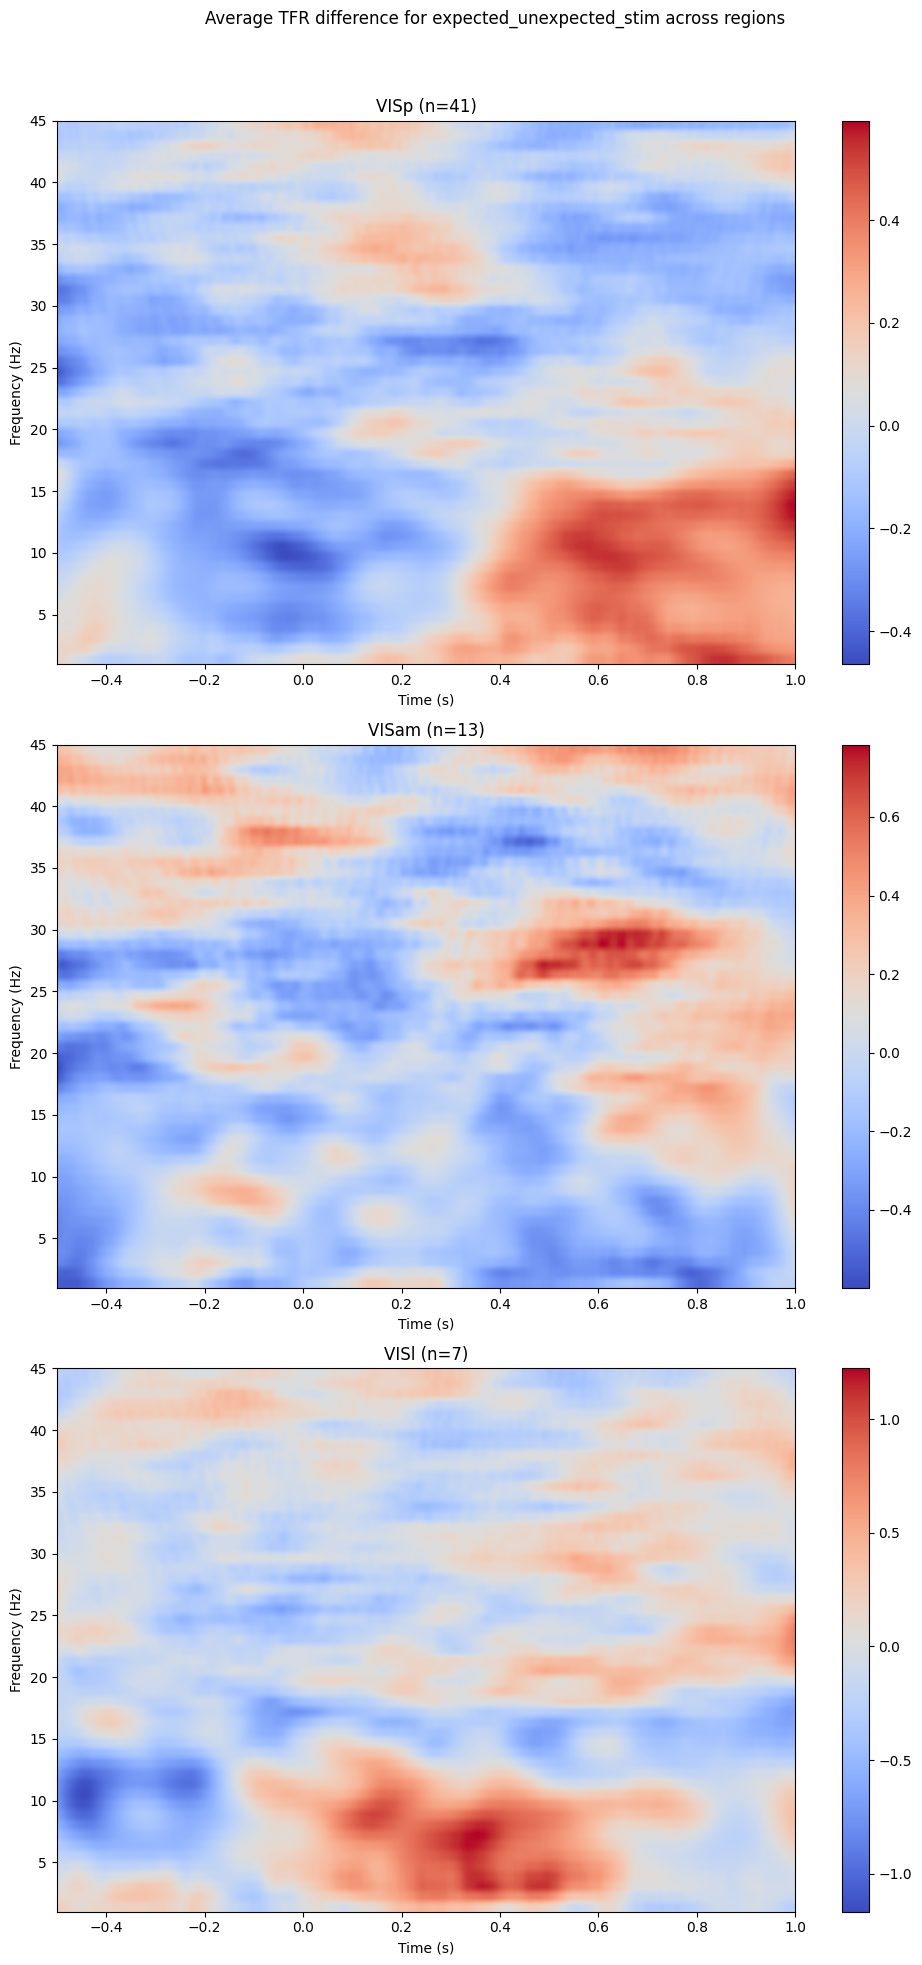

In [12]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import ast

condition = 'expected_unexpected_stim'
params = {
    'n_jobs': 5,
    'tmin': -0.5,
    'tmax': 1,
    'remove_first_trials_of_block': True,
    'overwrite': False,
    'min_trial': 10
}

regions = ['VISp', 'VISam', 'VISl']  # V1, AM, LM

# Create a single figure for all regions
fig, axs = plt.subplots(len(regions), 1, figsize=(10, 20))  
fig.suptitle(f'Average TFR difference for {condition} across regions')

for idx, region in enumerate(regions):
    path_table_info = f'/crnldata/cophy/TeamProjects/mohammad/ibl-oscillations/_analyses/extraction_module/data/eid_probe_info_{region}_{region}.csv'
    table = pd.read_csv(path_table_info)
    table['pid1'] = table['pid1'].apply(ast.literal_eval)
    pids = []
    eids = []
    for i, row in enumerate(table.iterrows()):
        eid = row[1]['eid']
        pid1 = row[1]['pid1']
        for pid in pid1:
            if os.path.isfile(f'/mnt/data/AdaptiveControl/IBLrawdata/pid_data/{pid}/lfp_{pid}_raw.fif'):
                pids.append(pid)
                eids.append(eid)
    
    all_insersions = []
    pids_to_plot = []
    nb_channels = []
    for pid in pids:
        path = f'/mnt/data/AdaptiveControl/IBLrawdata/TF_data/{region}/TFR_{condition}_{pid}.npy'
        if os.path.isfile(path):
            diff = np.load(path)
            nb_channel = diff.shape[0]
            diff_avg = np.mean(diff, axis=0, keepdims=False)
            all_insersions.append(diff_avg)
            pids_to_plot.append(pid)
            nb_channels.append(nb_channel)

    all_insersions = np.array(all_insersions)
    nb_subj = all_insersions.shape[0]
    print(all_insersions.shape)

    normalized_insersion = np.zeros_like(all_insersions)
    # Z-score normalization for each subject
    for i in range(all_insersions.shape[0]):
        mean = np.mean(all_insersions[i])
        std_dev = np.std(all_insersions[i])
        normalized_insersion[i] = (all_insersions[i] - mean) / std_dev

    # Average over subjects after normalization
    average_TF = np.mean(normalized_insersion, axis=0)

    # Plotting for each region in its own subplot
    tmin = params['tmin']
    tmax = params['tmax']
    axs[idx].imshow(average_TF, aspect='auto', origin='lower', cmap='coolwarm', extent=[tmin, tmax, 1, 45])
    axs[idx].set_title(f'{region} (n={nb_subj})')
    axs[idx].set_xlabel('Time (s)')
    axs[idx].set_ylabel('Frequency (Hz)')
    fig.colorbar(axs[idx].imshow(average_TF, aspect='auto', origin='lower', cmap='coolwarm', extent=[tmin, tmax, 1, 45]), ax=axs[idx])

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

    

# PrevSuccess_PrevFail

(38, 53, 351)
(20, 53, 351)
(7, 53, 351)


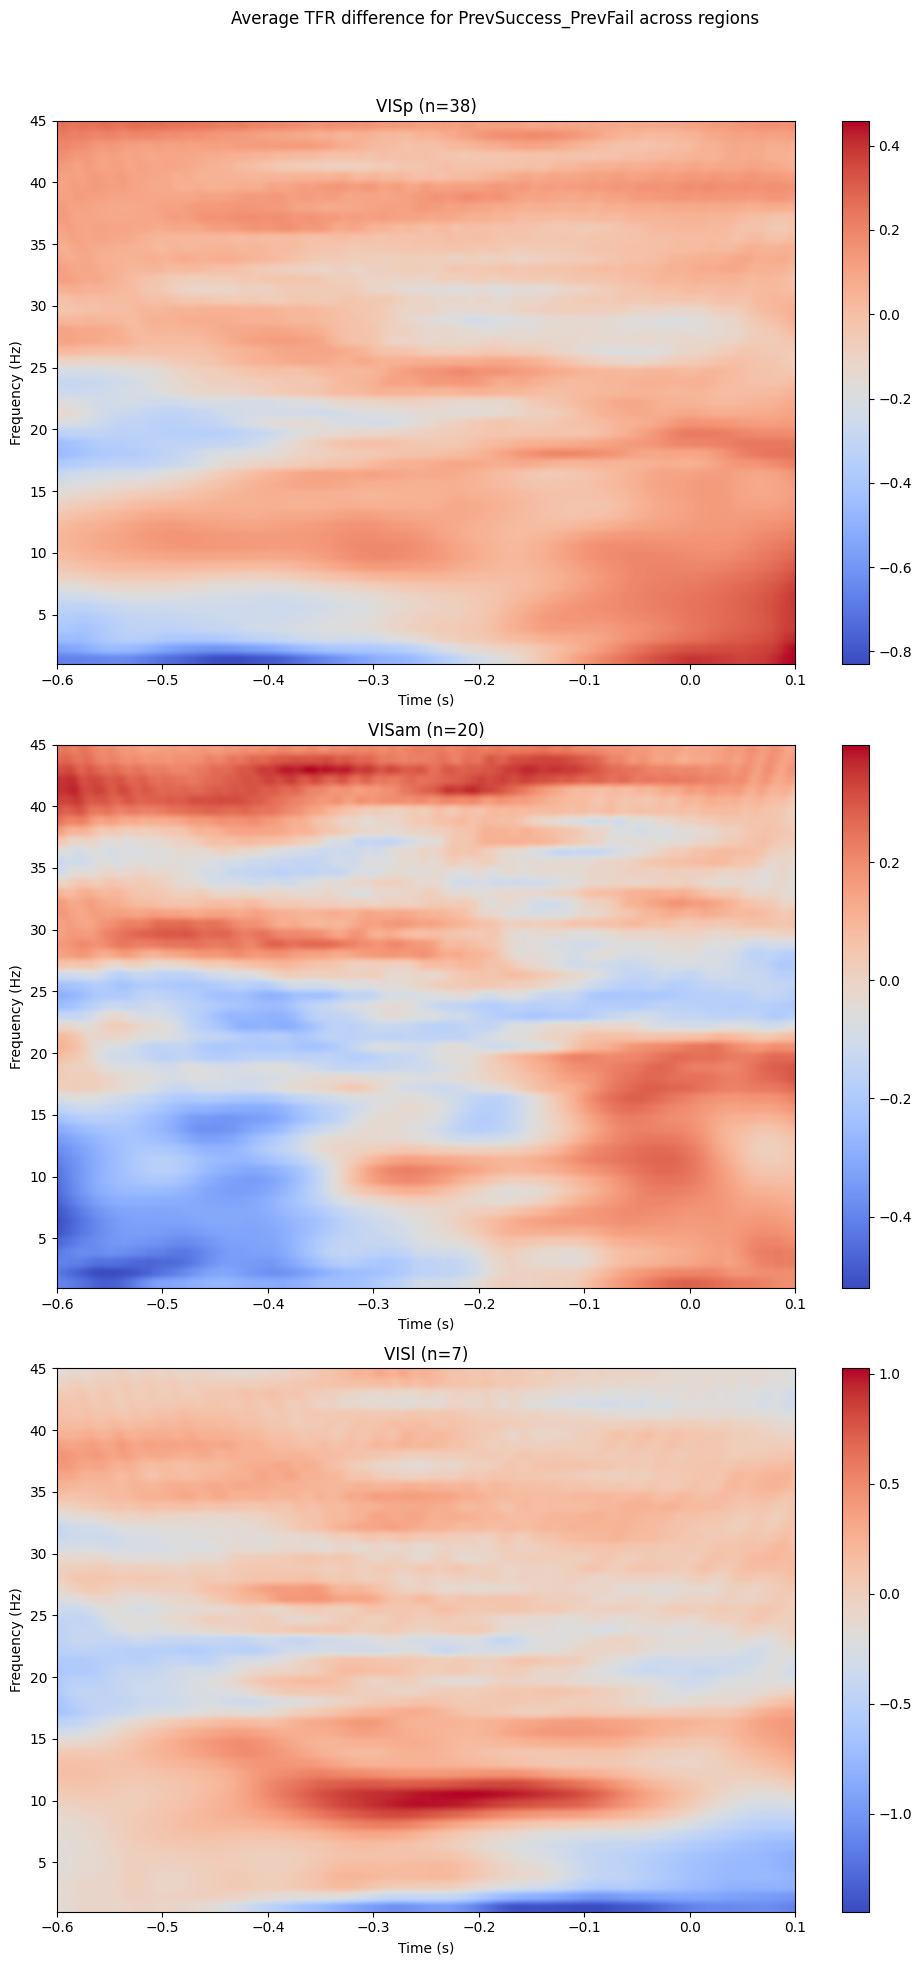

In [10]:
condition = 'PrevSuccess_PrevFail'


params = {
    'n_jobs': 5,
    'tmin': -0.6,
    'tmax': 0.1,
    'remove_first_trials_of_block': True,
    'overwrite': False,
    'min_trial': 10
}

regions = ['VISp', 'VISam', 'VISl']  # V1, AM, LM

# Create a single figure for all regions
fig, axs = plt.subplots(len(regions), 1, figsize=(10, 20))  
fig.suptitle(f'Average TFR difference for {condition} across regions')

for idx, region in enumerate(regions):
    path_table_info = f'/crnldata/cophy/TeamProjects/mohammad/ibl-oscillations/_analyses/extraction_module/data/eid_probe_info_{region}_{region}.csv'
    table = pd.read_csv(path_table_info)
    table['pid1'] = table['pid1'].apply(ast.literal_eval)
    pids = []
    eids = []
    for i, row in enumerate(table.iterrows()):
        eid = row[1]['eid']
        pid1 = row[1]['pid1']
        for pid in pid1:
            if os.path.isfile(f'/mnt/data/AdaptiveControl/IBLrawdata/pid_data/{pid}/lfp_{pid}_raw.fif'):
                pids.append(pid)
                eids.append(eid)
    
    all_insersions = []
    pids_to_plot = []
    nb_channels = []
    for pid in pids:
        path = f'/mnt/data/AdaptiveControl/IBLrawdata/TF_data/{region}/TFR_{condition}_{pid}.npy'
        if os.path.isfile(path):
            diff = np.load(path)
            nb_channel = diff.shape[0]
            diff_avg = np.mean(diff, axis=0, keepdims=False)
            all_insersions.append(diff_avg)
            pids_to_plot.append(pid)
            nb_channels.append(nb_channel)

    all_insersions = np.array(all_insersions)
    nb_subj = all_insersions.shape[0]
    print(all_insersions.shape)

    normalized_insersion = np.zeros_like(all_insersions)
    # Z-score normalization for each subject
    for i in range(all_insersions.shape[0]):
        mean = np.mean(all_insersions[i])
        std_dev = np.std(all_insersions[i])
        normalized_insersion[i] = (all_insersions[i] - mean) / std_dev

    # Average over subjects after normalization
    average_TF = np.mean(normalized_insersion, axis=0)

    # Plotting for each region in its own subplot
    tmin = params['tmin']
    tmax = params['tmax']
    axs[idx].imshow(average_TF, aspect='auto', origin='lower', cmap='coolwarm', extent=[tmin, tmax, 1, 45])
    axs[idx].set_title(f'{region} (n={nb_subj})')
    axs[idx].set_xlabel('Time (s)')
    axs[idx].set_ylabel('Frequency (Hz)')
    fig.colorbar(axs[idx].imshow(average_TF, aspect='auto', origin='lower', cmap='coolwarm', extent=[tmin, tmax, 1, 45]), ax=axs[idx])

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# BiasRight_BiasLeft

(40, 53, 351)
(18, 53, 351)
(9, 53, 351)


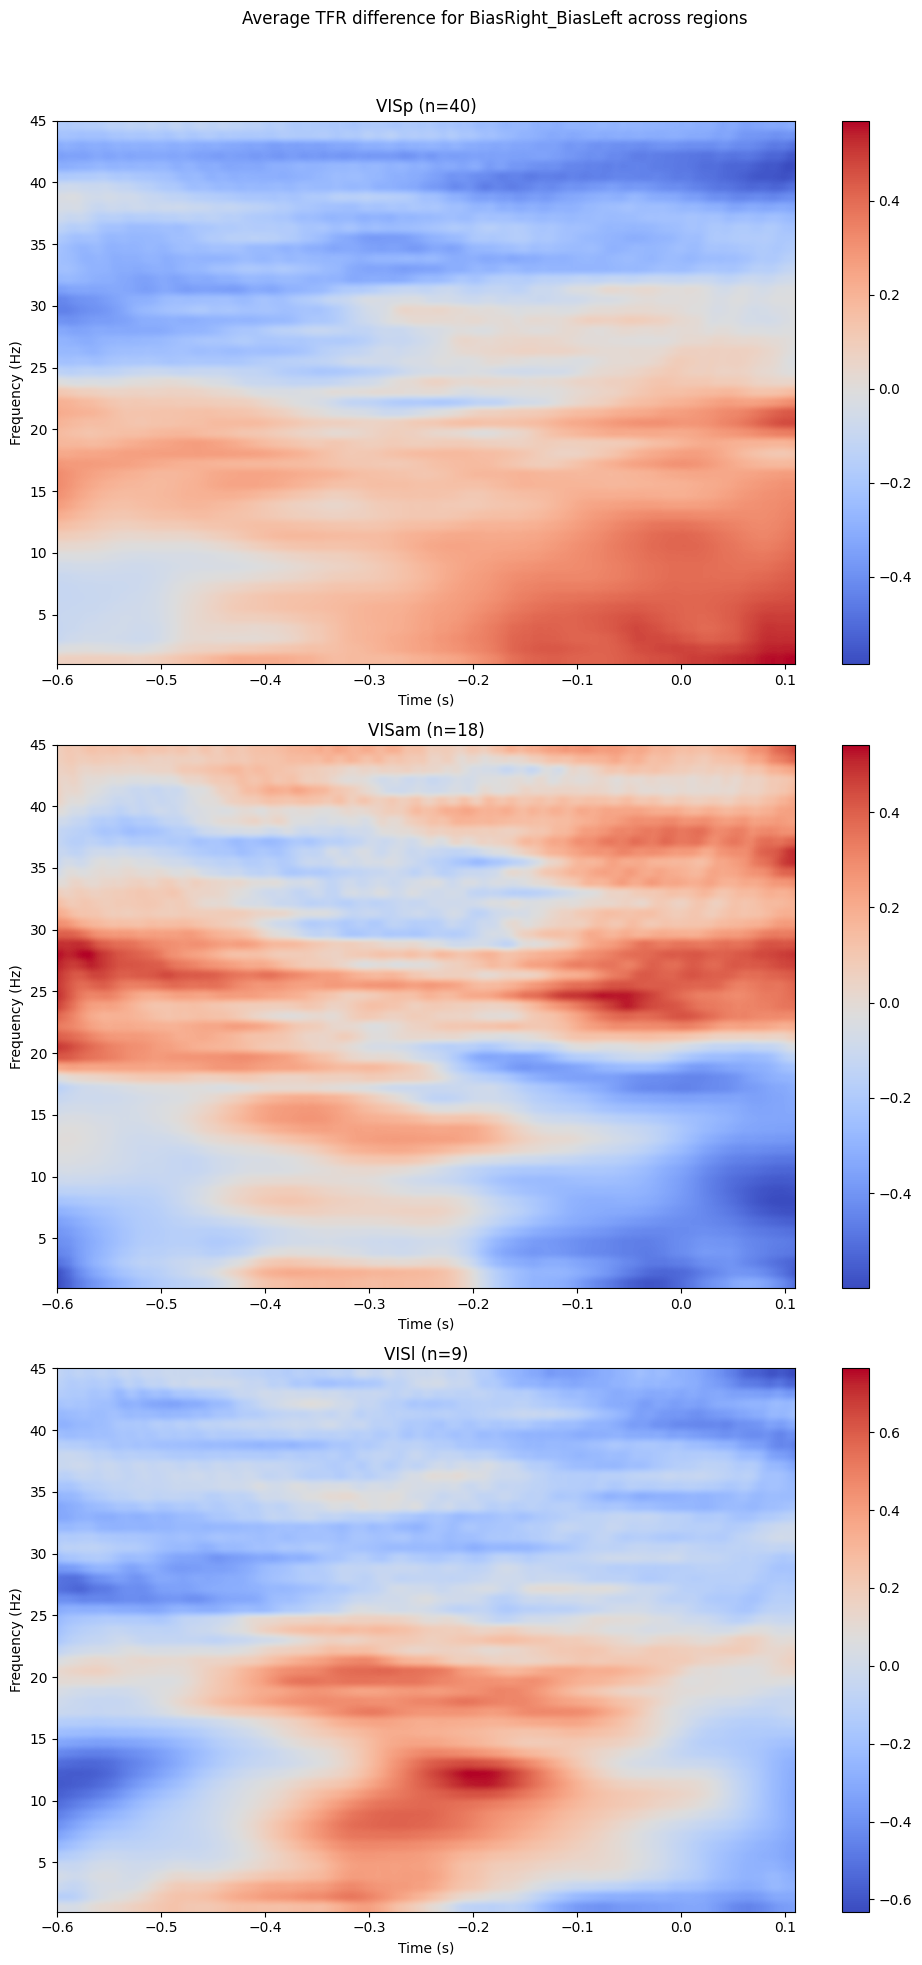

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import ast

condition = 'BiasRight_BiasLeft'
params = {
    'n_jobs': 5,
    'tmin': -0.6,
    'tmax': 0.11,
    'remove_first_trials_of_block': True,
    'overwrite': False,
    'min_trial': 10
}

regions = ['VISp', 'VISam', 'VISl']  # V1, AM, LM

# Create a single figure for all regions
fig, axs = plt.subplots(len(regions), 1, figsize=(10, 20))  # Create subplots based on the number of regions
fig.suptitle(f'Average TFR difference for {condition} across regions')

for idx, region in enumerate(regions):
    path_table_info = f'/crnldata/cophy/TeamProjects/mohammad/ibl-oscillations/_analyses/extraction_module/data/eid_probe_info_{region}_{region}.csv'
    table = pd.read_csv(path_table_info)
    table['pid1'] = table['pid1'].apply(ast.literal_eval)
    pids = []
    eids = []
    for i, row in enumerate(table.iterrows()):
        eid = row[1]['eid']
        pid1 = row[1]['pid1']
        for pid in pid1:
            if os.path.isfile(f'/mnt/data/AdaptiveControl/IBLrawdata/pid_data/{pid}/lfp_{pid}_raw.fif'):
                pids.append(pid)
                eids.append(eid)
    
    all_insersions = []
    pids_to_plot = []
    nb_channels = []
    for pid in pids:
        path = f'/mnt/data/AdaptiveControl/IBLrawdata/TF_data/{region}/TFR_{condition}_{pid}.npy'
        if os.path.isfile(path):
            diff = np.load(path)
            nb_channel = diff.shape[0]
            diff_avg = np.mean(diff, axis=0, keepdims=False)
            all_insersions.append(diff_avg)
            pids_to_plot.append(pid)
            nb_channels.append(nb_channel)

    all_insersions = np.array(all_insersions)
    nb_subj = all_insersions.shape[0]
    print(all_insersions.shape)

    normalized_insersion = np.zeros_like(all_insersions)
    # Z-score normalization for each subject
    for i in range(all_insersions.shape[0]):
        mean = np.mean(all_insersions[i])
        std_dev = np.std(all_insersions[i])
        normalized_insersion[i] = (all_insersions[i] - mean) / std_dev

    # Average over subjects after normalization
    average_TF = np.mean(normalized_insersion, axis=0)

    # Plotting for each region in its own subplot
    tmin = params['tmin']
    tmax = params['tmax']
    axs[idx].imshow(average_TF, aspect='auto', origin='lower', cmap='coolwarm', extent=[tmin, tmax, 1, 45])
    axs[idx].set_title(f'{region} (n={nb_subj})')
    axs[idx].set_xlabel('Time (s)')
    axs[idx].set_ylabel('Frequency (Hz)')
    fig.colorbar(axs[idx].imshow(average_TF, aspect='auto', origin='lower', cmap='coolwarm', extent=[tmin, tmax, 1, 45]), ax=axs[idx])

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
